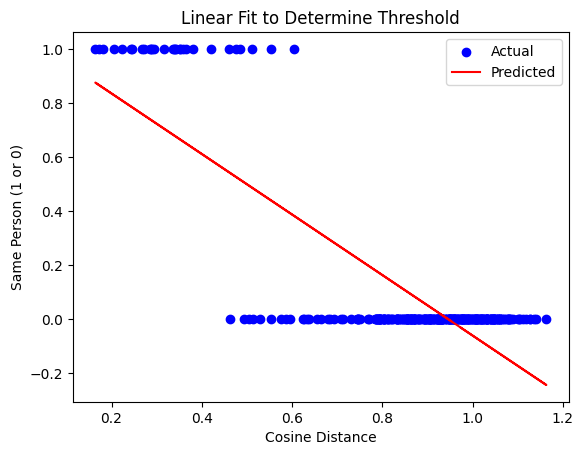

(-1.120404476678614, 1.0590796475885975)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
# Reload the CSV file
file_path = './output4.csv'
data = pd.read_csv(file_path)

# Extracting names and determining if they are from the same person
data['Name1'] = data['File1'].apply(extract_name)
data['Name2'] = data['File2'].apply(extract_name)
data['SamePerson'] = data['Name1'] == data['Name2']

# Converting 'SamePerson' to a numerical value for regression
data['SamePerson'] = data['SamePerson'].astype(int)

# Using Linear Regression for fitting
model = LinearRegression()
model.fit(data[['Distance']], data['SamePerson'])

# Predicting using the model
data['Predicted'] = model.predict(data[['Distance']])

# Plotting the results
plt.scatter(data['Distance'], data['SamePerson'], color='blue', label='Actual')
plt.plot(data['Distance'], data['Predicted'], color='red', label='Predicted')
plt.xlabel('Cosine Distance')
plt.ylabel('Same Person (1 or 0)')
plt.title('Linear Fit to Determine Threshold')
plt.legend()
plt.show()

# Outputting the model's coefficient and intercept
model.coef_[0], model.intercept_


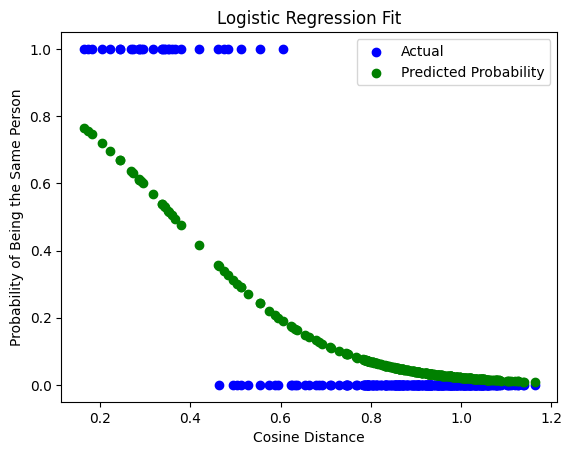

(-5.947623974052098, 2.1564521169640765)

In [17]:
from sklearn.linear_model import LogisticRegression

# Using Logistic Regression for a probability-based approach
log_model = LogisticRegression()
log_model.fit(data[['Distance']], data['SamePerson'])

# Coefficients and Intercept from the Logistic Regression Model
coef = log_model.coef_[0][0]
intercept = log_model.intercept_[0]

# Predicting probabilities using the Logistic Regression model
data['Prob_SamePerson'] = log_model.predict_proba(data[['Distance']])[:, 1]

# Plotting the results
plt.scatter(data['Distance'], data['SamePerson'], color='blue', label='Actual')
plt.scatter(data['Distance'], data['Prob_SamePerson'], color='green', label='Predicted Probability')
plt.xlabel('Cosine Distance')
plt.ylabel('Probability of Being the Same Person')
plt.title('Logistic Regression Fit')
plt.legend()
plt.show()

# Outputting the model's coefficient and intercept
coef, intercept



In [19]:
from scipy.optimize import minimize_scalar

# Function to find the threshold that corresponds to a certain probability
def find_threshold_for_probability(target_probability):
    # Objective function to minimize
    # We find the distance value where the predicted probability is closest to the target probability
    def objective(x):
        return (log_model.predict_proba([[x]])[0][1] - target_probability) ** 2

    result = minimize_scalar(objective)
    return result.x

target_probability = 0.7

# Finding the corresponding threshold
threshold = find_threshold_for_probability(target_probability)
print(threshold)

0.2201138252117343


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X d